In [10]:
from JDOS_model import JDOS
from data_filtering import data_filter, show_data_peaks, compare_filtered_data
from pandas import read_csv
from numpy import array
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

In [36]:
input_data = read_csv('PbTiO3.csv', sep=';')

last_index = 142

e1 = array(input_data['e1'][last_index::-1])
e2 = array(input_data['e2'][last_index::-1])
eV = array(input_data['eV'][last_index::-1])

e1_second_der = (UnivariateSpline(eV, e1, s=0)).derivative(2)(eV)
e2_second_der = (UnivariateSpline(eV, e2, s=0)).derivative(2)(eV)

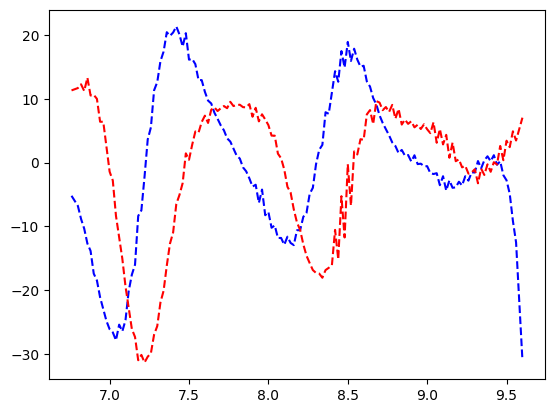

In [37]:
plt.plot(eV, e1_second_der, 'b--', eV, e2_second_der, 'r--')
plt.show()

C:\Users\jmmbo\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\jmmbo\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


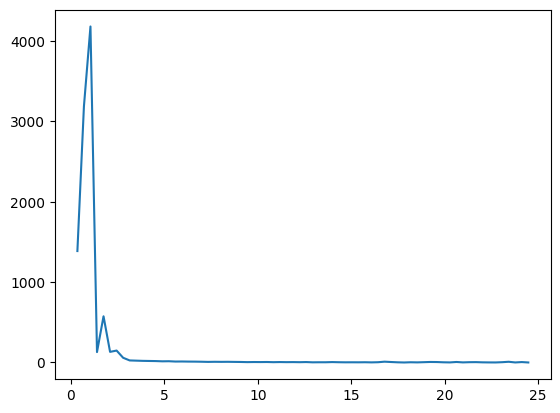

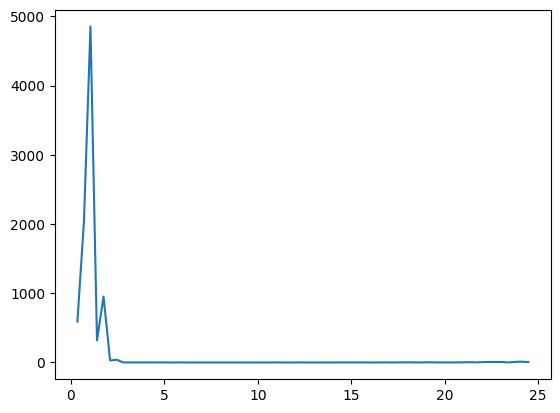

In [38]:
show_data_peaks(e1_second_der, 0.02)
show_data_peaks(e2_second_der, 0.02)

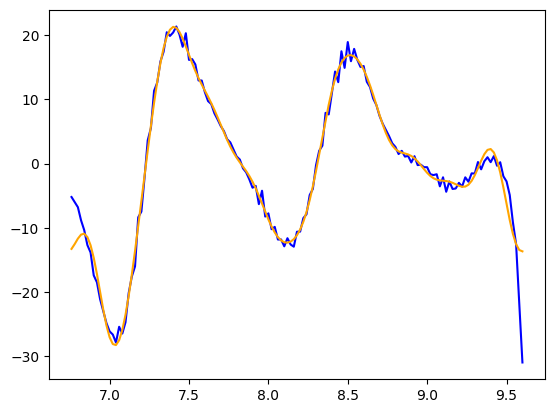

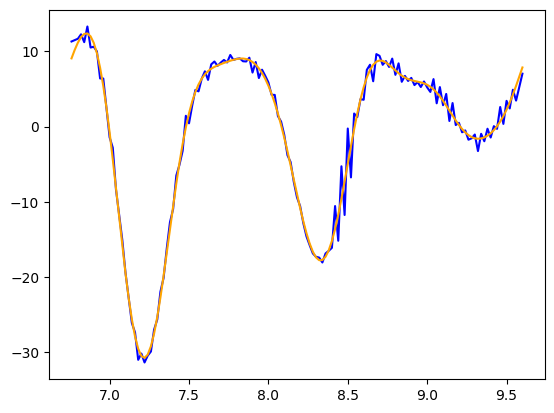

In [43]:
compare_filtered_data(eV, e1_second_der, 20)
compare_filtered_data(eV, e2_second_der, 20)

In [44]:
filtered_data1 = data_filter(e1_second_der, 20)
filtered_data2 = data_filter(e2_second_der, 20)

In [45]:
jdos = JDOS()

C:\Users\jmmbo\AppData\Roaming\Python\Python311\site-packages\scipy\optimize\_differentialevolution.py:387: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  with DifferentialEvolutionSolver(func, bounds, args=args,


It took: 107.33570169995073
Result: [0.059580103699072816, 0.06281176700551762, -0.05165218890696031, 0.06818214508599187, 10.395402100932143, 8.811710089196234, 5.090898148124003, 17.473313815458134, 8.327735995725904, 7.177030214791716, 8.145289514028576, 7.867407343912211, 0.32897757253932913, 0.2951324843417932, 1.5989135608619394, 1.4514185739354881, 2.224970680543086, -0.5680805507761538, 0.6325046566588725, 1.030617850575444]
m: [0.059580103699072816, 0.06281176700551762, -0.05165218890696031, 0.06818214508599187]
A: [10.395402100932143, 8.811710089196234, 5.090898148124003, 17.473313815458134]
E_ck: [8.327735995725904, 7.177030214791716, 8.145289514028576, 7.867407343912211]
gamma: [0.32897757253932913, 0.2951324843417932, 1.5989135608619394, 1.4514185739354881]
phi: [2.224970680543086, -0.5680805507761538, 0.6325046566588725, 1.030617850575444]
Fitness value(max 0): 36.35760266722346



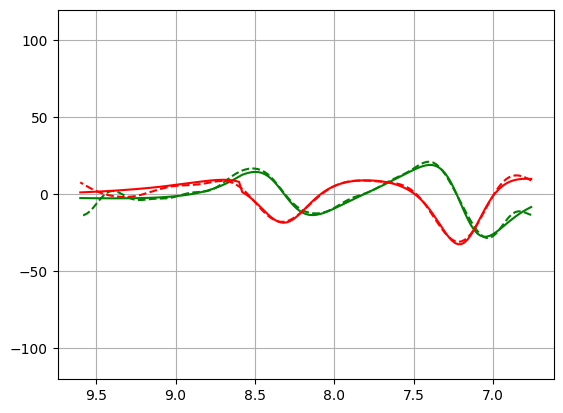

In [47]:
jdos.fitting_method(filepath='PbTiO3.csv',
                    last_index=142,
                    model_order=4,
                    filter_data=True,
                    threshold_e1=20,
                    threshold_e2=20,
                    plot=True,
                    discrete_m=False,
                    threads=8)

C:\Users\jmmbo\AppData\Roaming\Python\Python311\site-packages\scipy\optimize\_differentialevolution.py:387: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  with DifferentialEvolutionSolver(func, bounds, args=args,


It took: 3.1165867000236176
Result: [0.08212130713133826, 0.05354263285245219, -0.4050315451033443, 20.281656678518026, 17.88779565908954, 2.3641495955956047, 10.431222680190324, 8.404471908165252, 5.001979637192961, 3.728113580732619, 0.2277040887874038, 7.2364576340152, -1.9117695491740068, -1.0740608820949438, 2.5695691784355486]
m: [0.08212130713133826, 0.05354263285245219, -0.4050315451033443]
A: [20.281656678518026, 17.88779565908954, 2.3641495955956047]
E_ck: [10.431222680190324, 8.404471908165252, 5.001979637192961]
gamma: [3.728113580732619, 0.2277040887874038, 7.2364576340152]
phi: [-1.9117695491740068, -1.0740608820949438, 2.5695691784355486]
Fitness value(max 0): 170.78135568859292



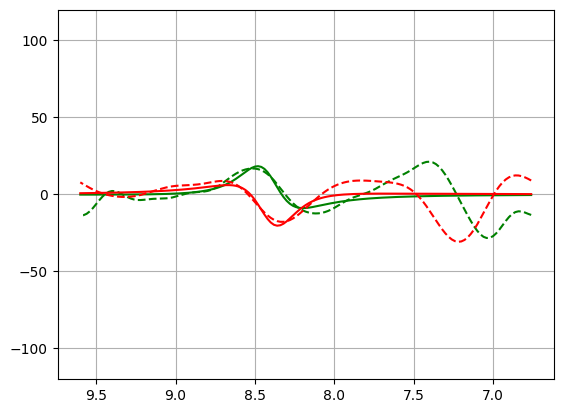

C:\Users\jmmbo\AppData\Roaming\Python\Python311\site-packages\scipy\optimize\_differentialevolution.py:387: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  with DifferentialEvolutionSolver(func, bounds, args=args,


It took: 3.584010999999009
Result: [-0.27817110142657214, -0.16013755806448848, 0.022328031557210012, 29.363896892666258, 27.320998635830538, 30.0, 2.1940630778187384, 1.620146359586117, 7.188903555836786, 6.280293601786485, 9.901517274004853, 0.25123967468121244, -1.4924757273403224, 0.4736753485183238, -0.6491966263450685]
m: [-0.27817110142657214, -0.16013755806448848, 0.022328031557210012]
A: [29.363896892666258, 27.320998635830538, 30.0]
E_ck: [2.1940630778187384, 1.620146359586117, 7.188903555836786]
gamma: [6.280293601786485, 9.901517274004853, 0.25123967468121244]
phi: [-1.4924757273403224, 0.4736753485183238, -0.6491966263450685]
Fitness value(max 0): 115.43088288844089



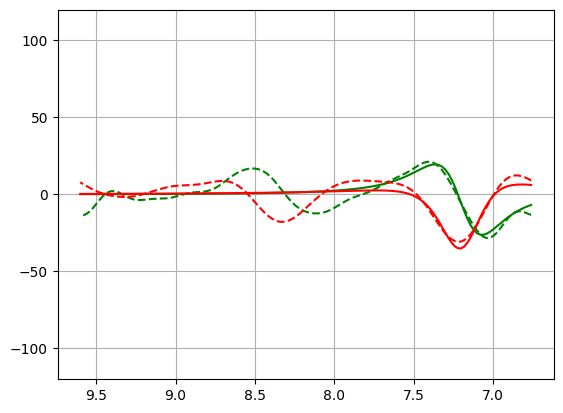

C:\Users\jmmbo\AppData\Roaming\Python\Python311\site-packages\scipy\optimize\_differentialevolution.py:387: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  with DifferentialEvolutionSolver(func, bounds, args=args,


It took: 82.84707509999862
Result: [-0.46623482512837755, -0.42014849431828505, -0.0647537477901044, -0.008197367814366363, 12.114705734888755, 1.032293226345823, 10.82378652682408, 26.067969933914995, 7.3939074719090545, 7.197918058457381, 8.369786598516583, 8.030904586445256, 4.948318206315446, 0.37811916754173946, 0.29331461679045834, 2.61350647310195, 0.879675635651931, -0.30687396203708894, 2.13483189370432, 0.6477122251686791]
m: [-0.46623482512837755, -0.42014849431828505, -0.0647537477901044, -0.008197367814366363]
A: [12.114705734888755, 1.032293226345823, 10.82378652682408, 26.067969933914995]
E_ck: [7.3939074719090545, 7.197918058457381, 8.369786598516583, 8.030904586445256]
gamma: [4.948318206315446, 0.37811916754173946, 0.29331461679045834, 2.61350647310195]
phi: [0.879675635651931, -0.30687396203708894, 2.13483189370432, 0.6477122251686791]
Fitness value(max 0): 37.34059857536298



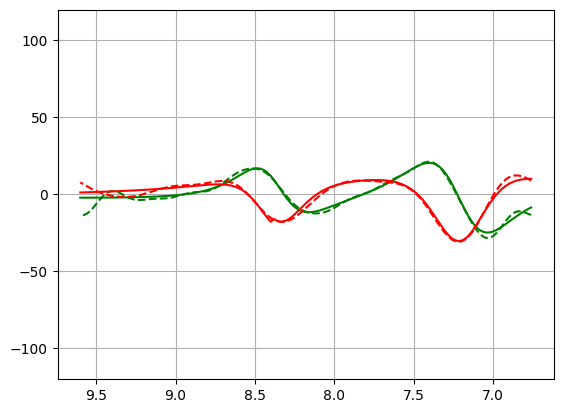

C:\Users\jmmbo\AppData\Roaming\Python\Python311\site-packages\scipy\optimize\_differentialevolution.py:387: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  with DifferentialEvolutionSolver(func, bounds, args=args,


It took: 106.26341149996733
Result: [-0.18032331150704706, -0.01973401471281904, 0.2612319890005613, 0.07071328252206653, 1.3188483351142342, 25.92736443094164, 26.456135805198233, 8.223478479327314, 8.00203530248594, 7.168334287462517, 3.77583669285009, 8.38912628286879, 1.2782466380274027, 0.31657317800450496, 7.709599189696515, 0.3370189566555084, -2.6993476379891606, 2.574131796407442, 1.6259635238745618, -1.0640705736525895]
m: [-0.18032331150704706, -0.01973401471281904, 0.2612319890005613, 0.07071328252206653]
A: [1.3188483351142342, 25.92736443094164, 26.456135805198233, 8.223478479327314]
E_ck: [8.00203530248594, 7.168334287462517, 3.77583669285009, 8.38912628286879]
gamma: [1.2782466380274027, 0.31657317800450496, 7.709599189696515, 0.3370189566555084]
phi: [-2.6993476379891606, 2.574131796407442, 1.6259635238745618, -1.0640705736525895]
Fitness value(max 0): 33.18420950468629



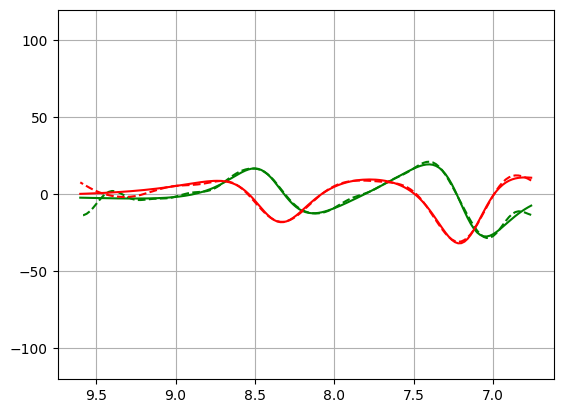

C:\Users\jmmbo\AppData\Roaming\Python\Python311\site-packages\scipy\optimize\_differentialevolution.py:387: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  with DifferentialEvolutionSolver(func, bounds, args=args,


It took: 130.99510429997463
Result: [0.025369617211017603, -0.39082953330571363, -0.012313368310506057, 0.040628068253297456, -0.3078812474102579, 21.303071394261547, 16.385013993354406, 25.99838611699959, 13.941001234766699, 0.8759396329395646, 7.163710700865316, 9.950974353461142, 8.171879465517428, 8.345750912655832, 6.648701480692016, 0.30269201740673246, 9.4658417059368, 1.0857530300417486, 0.3518334207470284, 4.411427002063577, -0.5365020987119886, 0.5688565800527168, 0.5926042806074666, 2.1644987123312216, 1.4031767713726082]
m: [0.025369617211017603, -0.39082953330571363, -0.012313368310506057, 0.040628068253297456, -0.3078812474102579]
A: [21.303071394261547, 16.385013993354406, 25.99838611699959, 13.941001234766699, 0.8759396329395646]
E_ck: [7.163710700865316, 9.950974353461142, 8.171879465517428, 8.345750912655832, 6.648701480692016]
gamma: [0.30269201740673246, 9.4658417059368, 1.0857530300417486, 0.3518334207470284, 4.411427002063577]
phi: [-0.5365020987119886, 0.56885658

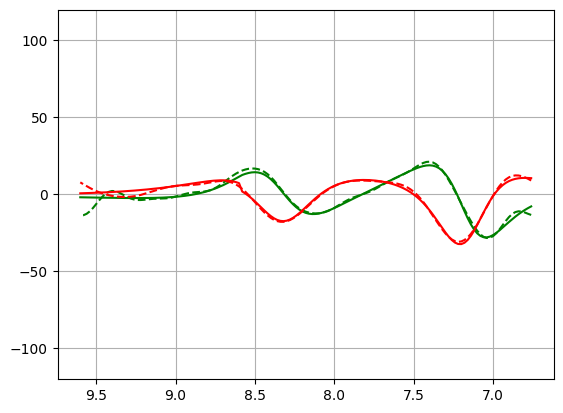

C:\Users\jmmbo\AppData\Roaming\Python\Python311\site-packages\scipy\optimize\_differentialevolution.py:387: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  with DifferentialEvolutionSolver(func, bounds, args=args,


It took: 134.81372310000006
Result: [-0.2883688962701333, 0.1161923566655052, 0.12113137134270713, 0.0508952241775944, 0.4094778206451406, 1.5560738207631815, 20.34765235035444, 2.300697342901268, 12.146133227567653, 8.225869039321603, 7.190389268734487, 9.440519109216016, 8.577405428180644, 8.372252801520986, 6.329428904682787, 0.36155059261484723, 0.23588290995891814, 1.4671984676974028, 0.33281369494940094, 9.394345055376842, -0.36869342469360394, 1.721314817126837, -2.787318215076989, -0.9408805642370142, -0.52511391797899]
m: [-0.2883688962701333, 0.1161923566655052, 0.12113137134270713, 0.0508952241775944, 0.4094778206451406]
A: [1.5560738207631815, 20.34765235035444, 2.300697342901268, 12.146133227567653, 8.225869039321603]
E_ck: [7.190389268734487, 9.440519109216016, 8.577405428180644, 8.372252801520986, 6.329428904682787]
gamma: [0.36155059261484723, 0.23588290995891814, 1.4671984676974028, 0.33281369494940094, 9.394345055376842]
phi: [-0.36869342469360394, 1.721314817126837, 

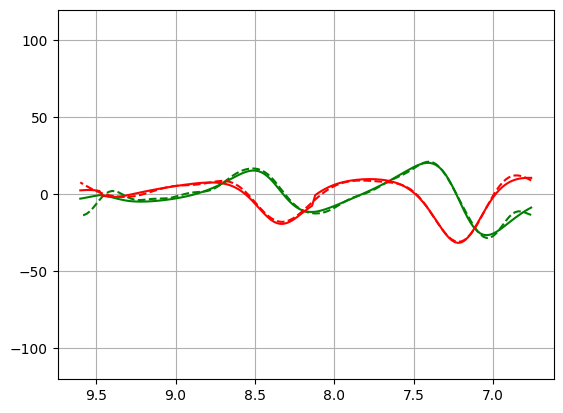

dAIC: {3: 0.0, 4: 7.692533213422642, 5: 18.737747796000917}

dBIC: {3: 0.0, 4: 8.939236105798805, 5: 22.49451127683178}



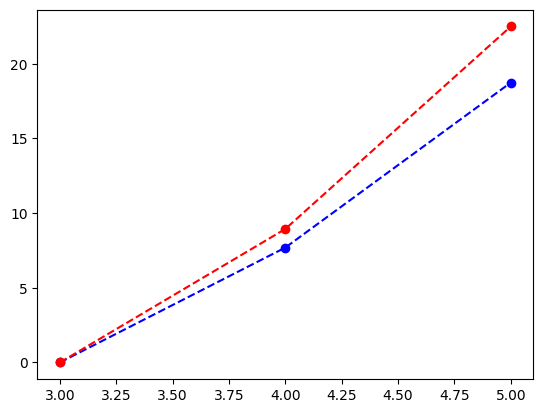

In [48]:
jdos.compare_model_order(
                        order_bounds=[3,6],
                        tests_per_order=2,
                        filepath='PbTiO3.csv',
                        last_index=142,
                        filter_data=True,
                        threshold_e1=20,
                        threshold_e2=20,
                        plot=True,
                        discrete_m=False,
                        threads=8)